In [1]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split

# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.layers import concatenate
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
# import matplotlib.pyplot as plt

In [2]:
app = pd.read_csv('../data/application_train.csv')

In [5]:
app.DAYS_EMPLOYED.max()

365243

In [6]:
app.DAYS_EMPLOYED.replace(365243, np.nan, inplace=True)

In [3]:
app.CODE_GENDER

0         M
1         F
2         M
3         F
4         M
         ..
307506    M
307507    F
307508    F
307509    F
307510    F
Name: CODE_GENDER, Length: 307511, dtype: object

Random under-sampling:
0    282686
1     24825
Name: TARGET, dtype: int64


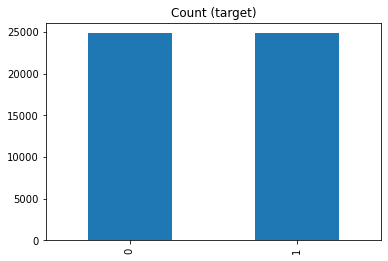

In [14]:
count_class_0, count_class_1 = app.TARGET.value_counts()
df_class_0 = app[app['TARGET'] == 0]
df_class_1 = app[app['TARGET'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(app.TARGET.value_counts())

df.TARGET.value_counts().plot(kind='bar', title='Count (target)');

In [15]:
df = df[df.columns[df.isnull().mean() < 0.3]]
df = df._get_numeric_data()
df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
94191,209373,0,2,211500.0,511920.0,13630.5,405000.0,0.009657,-14456,-220,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
47608,155150,0,0,85500.0,526491.0,19039.5,454500.0,0.022625,-18129,365243,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
189722,319976,0,0,135000.0,288873.0,22950.0,238500.0,0.025164,-10767,-3379,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
269071,411814,0,0,67500.0,172692.0,20623.5,162000.0,0.020246,-14279,-443,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
157728,282828,0,1,180000.0,719860.5,51934.5,679500.0,0.022625,-14281,-2541,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,1,207000.0,450000.0,32746.5,450000.0,0.020246,-9918,-3048,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307475,456215,1,1,144000.0,1303200.0,46809.0,1125000.0,0.007330,-13416,-2405,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,6.0
307481,456225,1,0,225000.0,297000.0,19975.5,297000.0,0.008575,-20644,-3147,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
307489,456233,1,0,225000.0,521280.0,23089.5,450000.0,0.014464,-16471,-286,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0


In [16]:
df = df[df.corr().abs()['TARGET'].sort_values(ascending=False)[:31].index]
df = df.fillna(df.mean())

In [17]:
X, y = df.values[:, 1:], df.values[:, 0]

In [20]:
scaler = MinMaxScaler()
x = scaler.fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)#, random_state=42)

In [34]:
model = keras.Sequential(
    [
        layers.Input(shape = (x.shape[1],)),
        layers.Dense(200, activation="relu"),
        layers.Dense(150, activation="relu"),
        layers.Dense(100, activation="relu"),
        layers.Dense(20, activation="relu"),
        layers.Dense(1, activation='sigmoid'),
    ]
)



# model = Sequential()
# model.layers.add(Dense(50, input_dim=60, activation='relu'))
# model.layers.add(Dense(20, activation='relu'))
# model.layers.add(Dense(1, activation='sigmoid'))
# # compile the keras model






model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train, epochs= 100, batch_size=100, validation_data=(X_test,y_test) )

Epoch 1/100
333/333 [==============================] - 1s 2ms/step - loss: 0.6285 - accuracy: 0.6492 - val_loss: 0.6231 - val_accuracy: 0.6589
Epoch 2/100
333/333 [==============================] - 1s 2ms/step - loss: 0.6174 - accuracy: 0.6595 - val_loss: 0.6188 - val_accuracy: 0.6624
Epoch 3/100
333/333 [==============================] - 1s 2ms/step - loss: 0.6157 - accuracy: 0.6608 - val_loss: 0.6172 - val_accuracy: 0.6632
Epoch 4/100
333/333 [==============================] - 1s 2ms/step - loss: 0.6140 - accuracy: 0.6636 - val_loss: 0.6161 - val_accuracy: 0.6623
Epoch 5/100
333/333 [==============================] - 1s 2ms/step - loss: 0.6128 - accuracy: 0.6648 - val_loss: 0.6165 - val_accuracy: 0.6622
Epoch 6/100
333/333 [==============================] - 1s 2ms/step - loss: 0.6132 - accuracy: 0.6671 - val_loss: 0.6167 - val_accuracy: 0.6644
Epoch 7/100
333/333 [==============================] - 1s 2ms/step - loss: 0.6115 - accuracy: 0.6667 - val_loss: 0.6157 - val_accuracy: 0.6620

Epoch 58/100
333/333 [==============================] - 1s 2ms/step - loss: 0.4256 - accuracy: 0.7929 - val_loss: 0.9222 - val_accuracy: 0.6184
Epoch 59/100
333/333 [==============================] - 1s 2ms/step - loss: 0.4190 - accuracy: 0.7983 - val_loss: 0.9870 - val_accuracy: 0.6145
Epoch 60/100
333/333 [==============================] - 1s 2ms/step - loss: 0.4138 - accuracy: 0.8001 - val_loss: 0.9720 - val_accuracy: 0.6155
Epoch 61/100
333/333 [==============================] - 1s 2ms/step - loss: 0.4118 - accuracy: 0.8008 - val_loss: 0.9985 - val_accuracy: 0.6296
Epoch 62/100
333/333 [==============================] - 1s 2ms/step - loss: 0.4016 - accuracy: 0.8081 - val_loss: 1.0150 - val_accuracy: 0.6124
Epoch 63/100
333/333 [==============================] - 1s 2ms/step - loss: 0.3957 - accuracy: 0.8118 - val_loss: 1.0315 - val_accuracy: 0.6173
Epoch 64/100
333/333 [==============================] - 1s 2ms/step - loss: 0.3865 - accuracy: 0.8145 - val_loss: 1.0922 - val_accuracy:

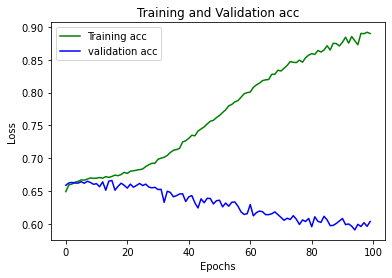

In [36]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs, loss_train, 'g', label='Training acc')
plt.plot(epochs, loss_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

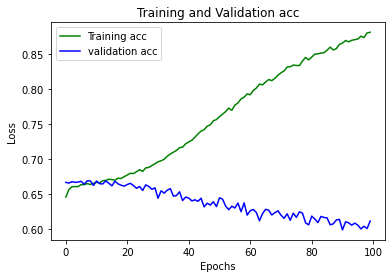

In [32]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs, loss_train, 'g', label='Training acc')
plt.plot(epochs, loss_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)